In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
#!pip install pandas pyarrow
import pyarrow

import glob

import pyarrow.parquet as pq

#files = glob.glob('../data/raw/*.parquet.gzip')
#movies = pd.concat([pq.read_table(fp).to_pandas() for fp in files])
movies = pq.read_table(source="../data/raw/df.parquet.gzip").to_pandas()
movies


,adult,id,original_title,popularity,video,url,poster_url,genre_id
380000,False,537245,El Pescador,0.600,False,https://www.themoviedb.org/movie/537245,https://www.themoviedb.org/t/p/w500//pOOabahFF...,[]
380001,False,537246,Der Herzog von Aleria,0.600,False,https://www.themoviedb.org/movie/537246,None,[18]
380002,False,537247,Wem nie durch Liebe Leid geschah!,0.600,False,https://www.themoviedb.org/movie/537247,None,[18]
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,"[80, 18]"
380004,False,537251,民暴の帝王,0.600,False,https://www.themoviedb.org/movie/537251,https://www.themoviedb.org/t/p/w500//5ayhYaAfg...,[]
...,...,...,...,...,...,...,...,...
19995,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,[10402]
19996,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,[10402]
19997,False,31793,"Rob Zombie: Past, Present & Future",2.570,False,https://www.themoviedb.org/movie/31793,None,[10402]
19998,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,"[28, 10402]"


In [2]:
### Check null values

movies.isnull().sum()

# there are movies without gender 
movies = movies.drop(movies[movies['genre_id']=='[]'].index)

movies[movies['genre_id']=='[]']

# The list is a list of integers  , reason why a I made this function .

map_gender={"28":"Action",
"12":"Adventure",
"16":"Animation",
"35":"Comedy",
"80":"Crime",
"99":"Documentary",
"18":"Drama",
"10751":"Family",
"14":"Fantasy",
"36":	"History",
"27":"Horror",
"10402"	:"Music",
"9648":"Mystery",
"10749":"Romance",
"878"	:"Science Fiction",
"10770":"TV Movie",
"53":"Thriller",
"10752":"War",
"37":"Western" }

def map_multiclass(x):
  
  tmp=[]  
  

  for y in x.split(","):
   
    y=y.replace('[', '') 
    y=y.replace(']', '') 
    y=y.replace(' ', '') 
 
    if y in map_gender:
     tmp.append(map_gender[y])
 


  return [','.join(tmp)]


movies['genre_ids2']=movies['genre_id'].apply(lambda x: map_multiclass(x))


movies













,adult,id,original_title,popularity,video,url,poster_url,genre_id,genre_ids2
380001,False,537246,Der Herzog von Aleria,0.600,False,https://www.themoviedb.org/movie/537246,None,[18],[Drama]
380002,False,537247,Wem nie durch Liebe Leid geschah!,0.600,False,https://www.themoviedb.org/movie/537247,None,[18],[Drama]
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,"[80, 18]","[Crime,Drama]"
380010,False,537266,Success,0.600,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,[18],[Drama]
380017,False,537274,Предел возможного,0.620,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,[18],[Drama]
...,...,...,...,...,...,...,...,...,...
19995,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,[10402],[Music]
19996,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,[10402],[Music]
19997,False,31793,"Rob Zombie: Past, Present & Future",2.570,False,https://www.themoviedb.org/movie/31793,None,[10402],[Music]
19998,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,"[28, 10402]","[Action,Music]"


In [4]:

movies = movies.drop(movies[movies['poster_url'].isnull()].index)
movies

,adult,id,original_title,popularity,video,url,poster_url,genre_id,genre_ids2
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,"[80, 18]","[Crime,Drama]"
380010,False,537266,Success,0.600,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,[18],[Drama]
380017,False,537274,Предел возможного,0.620,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,[18],[Drama]
380020,False,537277,母親,0.600,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,[18],[Drama]
380022,False,537281,1+1=3 Ora Tinjon,0.600,False,https://www.themoviedb.org/movie/537281,https://www.themoviedb.org/t/p/w500//47yYJPL2q...,[18],[Drama]
...,...,...,...,...,...,...,...,...,...
19993,False,31788,"Bill Hicks Live: Satirist, Social Critic, Stan...",5.355,False,https://www.themoviedb.org/movie/31788,https://www.themoviedb.org/t/p/w500//lz2poVfHS...,[35],[Comedy]
19994,False,31789,Pédale douce,6.775,False,https://www.themoviedb.org/movie/31789,https://www.themoviedb.org/t/p/w500//xYFrGGsmK...,[35],[Comedy]
19995,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,[10402],[Music]
19996,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,[10402],[Music]


<AxesSubplot:xlabel='Multiclass'>

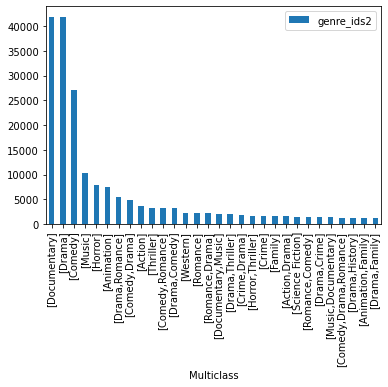

In [5]:

## Dist of genders

## Toop 30 multiclasses

top30=pd.DataFrame(movies.genre_ids2.value_counts().sort_values(ascending=False)[0:30]).reset_index().rename(columns={'index': 'Multiclass'})

top30.plot.bar( x='Multiclass', y='genre_ids2')


In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb= MultiLabelBinarizer()
labeled=pd.DataFrame(mlb.fit_transform(movies['genre_ids2']),columns=mlb.classes_)
movies.reset_index(drop=True, inplace=True)
movies_multilabel=pd.concat([movies,labeled],axis=1)
movies_multilabel 

,adult,id,original_title,popularity,video,url,poster_url,genre_id,genre_ids2,Action,...,"Western,Thriller","Western,Thriller,Action","Western,Thriller,Drama","Western,Thriller,Horror","Western,Thriller,TV Movie","Western,War","Western,War,Action","Western,War,Adventure,History,Science Fiction,Animation","Western,War,Drama,Music","Western,War,History,Romance"
0,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,"[80, 18]","[Crime,Drama]",0,...,0,0,0,0,0,0,0,0,0,0
1,False,537266,Success,0.600,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,[18],[Drama],0,...,0,0,0,0,0,0,0,0,0,0
2,False,537274,Предел возможного,0.620,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,[18],[Drama],0,...,0,0,0,0,0,0,0,0,0,0
3,False,537277,母親,0.600,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,[18],[Drama],0,...,0,0,0,0,0,0,0,0,0,0
4,False,537281,1+1=3 Ora Tinjon,0.600,False,https://www.themoviedb.org/movie/537281,https://www.themoviedb.org/t/p/w500//47yYJPL2q...,[18],[Drama],0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281573,False,31788,"Bill Hicks Live: Satirist, Social Critic, Stan...",5.355,False,https://www.themoviedb.org/movie/31788,https://www.themoviedb.org/t/p/w500//lz2poVfHS...,[35],[Comedy],0,...,0,0,0,0,0,0,0,0,0,0
281574,False,31789,Pédale douce,6.775,False,https://www.themoviedb.org/movie/31789,https://www.themoviedb.org/t/p/w500//xYFrGGsmK...,[35],[Comedy],0,...,0,0,0,0,0,0,0,0,0,0
281575,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,[10402],[Music],0,...,0,0,0,0,0,0,0,0,0,0
281576,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,[10402],[Music],0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
movies_multilabel.isnull().sum()

adult                                                      0
id                                                         0
original_title                                             0
popularity                                                 0
video                                                      0
                                                          ..
Western,War                                                0
Western,War,Action                                         0
Western,War,Adventure,History,Science Fiction,Animation    0
Western,War,Drama,Music                                    0
Western,War,History,Romance                                0
Length: 9151, dtype: int64

In [9]:
movies_multilabel.genre_ids2.nunique

<bound method IndexOpsMixin.nunique of 0         [Crime,Drama]
1               [Drama]
2               [Drama]
3               [Drama]
4               [Drama]
              ...      
281573         [Comedy]
281574         [Comedy]
281575          [Music]
281576          [Music]
281577          [Music]
Name: genre_ids2, Length: 281578, dtype: object>

In [10]:
movies_multilabel.to_parquet("../data/interim/df_multilabel.parquet.gzip", compression='gzip')


In [ ]:
#################################################################################  
#################################################################################  
############################ DATA FRAME SAMPLE #####################################
#################################################################################  
#################################################################################  

In [32]:
## Review gender name  Explode the gender list in x rows to make a class and not multiclass

#movies= pd.read_csv('movies - movies.csv')

movies_classes = pq.read_table(source="../data/raw/df.parquet.gzip").to_pandas()
movies_classes


movies_classes['genre_id'] = movies_classes['genre_id'].apply(literal_eval) #convert to list type type was extrange in the excel
movie_gender=movies_classes.explode('genre_id')

movie_gender[movie_gender.original_title=='Submarine D-1']

# the movie is x times depend on the gender 


,adult,id,original_title,popularity,video,url,poster_url,genre_id
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,28
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,18


In [33]:
movie_gender

,adult,id,original_title,popularity,video,url,poster_url,genre_id
380000,False,537245,El Pescador,0.600,False,https://www.themoviedb.org/movie/537245,https://www.themoviedb.org/t/p/w500//pOOabahFF...,NaN
380001,False,537246,Der Herzog von Aleria,0.600,False,https://www.themoviedb.org/movie/537246,None,18
380002,False,537247,Wem nie durch Liebe Leid geschah!,0.600,False,https://www.themoviedb.org/movie/537247,None,18
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,80
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,18
...,...,...,...,...,...,...,...,...
19996,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,10402
19997,False,31793,"Rob Zombie: Past, Present & Future",2.570,False,https://www.themoviedb.org/movie/31793,None,10402
19998,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,28
19998,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,10402


In [38]:

## merge both datasets

gender_list= pd.read_csv('../data/raw/movie_genres - movie_genres.csv')

gender_list=gender_list.rename(columns={"id":"genre_id"})

movie_gender_name=pd.merge(movie_gender,gender_list,left_on='genre_id', right_on='genre_id' ,how="left" )
movie_gender_name[movie_gender_name.original_title=='Submarine D-1']



,adult,id,original_title,popularity,video,url,poster_url,genre_id,name
337651,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,28,Action
337652,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,18,Drama


In [39]:
movie_gender_name

,adult,id,original_title,popularity,video,url,poster_url,genre_id,name
0,False,537245,El Pescador,0.600,False,https://www.themoviedb.org/movie/537245,https://www.themoviedb.org/t/p/w500//pOOabahFF...,NaN,NaN
1,False,537246,Der Herzog von Aleria,0.600,False,https://www.themoviedb.org/movie/537246,None,18,Drama
2,False,537247,Wem nie durch Liebe Leid geschah!,0.600,False,https://www.themoviedb.org/movie/537247,None,18,Drama
3,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,80,Crime
4,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,18,Drama
...,...,...,...,...,...,...,...,...,...
813263,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,10402,Music
813264,False,31793,"Rob Zombie: Past, Present & Future",2.570,False,https://www.themoviedb.org/movie/31793,None,10402,Music
813265,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,28,Action
813266,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,10402,Music


In [41]:

## Check nulls  note poster can have null values but not the gender
movie_gender_name = movie_gender_name.drop(movie_gender_name[movie_gender_name['poster_url'].isnull()].index)
movie_gender_name
movie_gender_name=movie_gender_name.dropna()
movie_gender_name.isnull().sum()



adult             0
id                0
original_title    0
popularity        0
video             0
url               0
poster_url        0
genre_id          0
name              0
dtype: int64

In [44]:
movie_gender_name.head(5)

,adult,id,original_title,popularity,video,url,poster_url,genre_id,name
3,False,537250,¿Por qué ya no me quieres?,1.40,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,80,Crime
4,False,537250,¿Por qué ya no me quieres?,1.40,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,18,Drama
11,False,537266,Success,0.60,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,18,Drama
18,False,537274,Предел возможного,0.62,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,18,Drama
21,False,537277,母親,0.60,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,18,Drama


In [43]:
top30_separateClass=pd.DataFrame(movie_gender_name.name.value_counts()).reset_index().rename(columns={'index': 'class_'})
top30_separateClass

,class_,name
0,Drama,97991
1,Comedy,64549
2,Documentary,50366
3,Romance,25851
4,Action,23948
5,Thriller,23580
6,Horror,21383
7,Music,19729
8,Animation,18575
9,Crime,16629


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

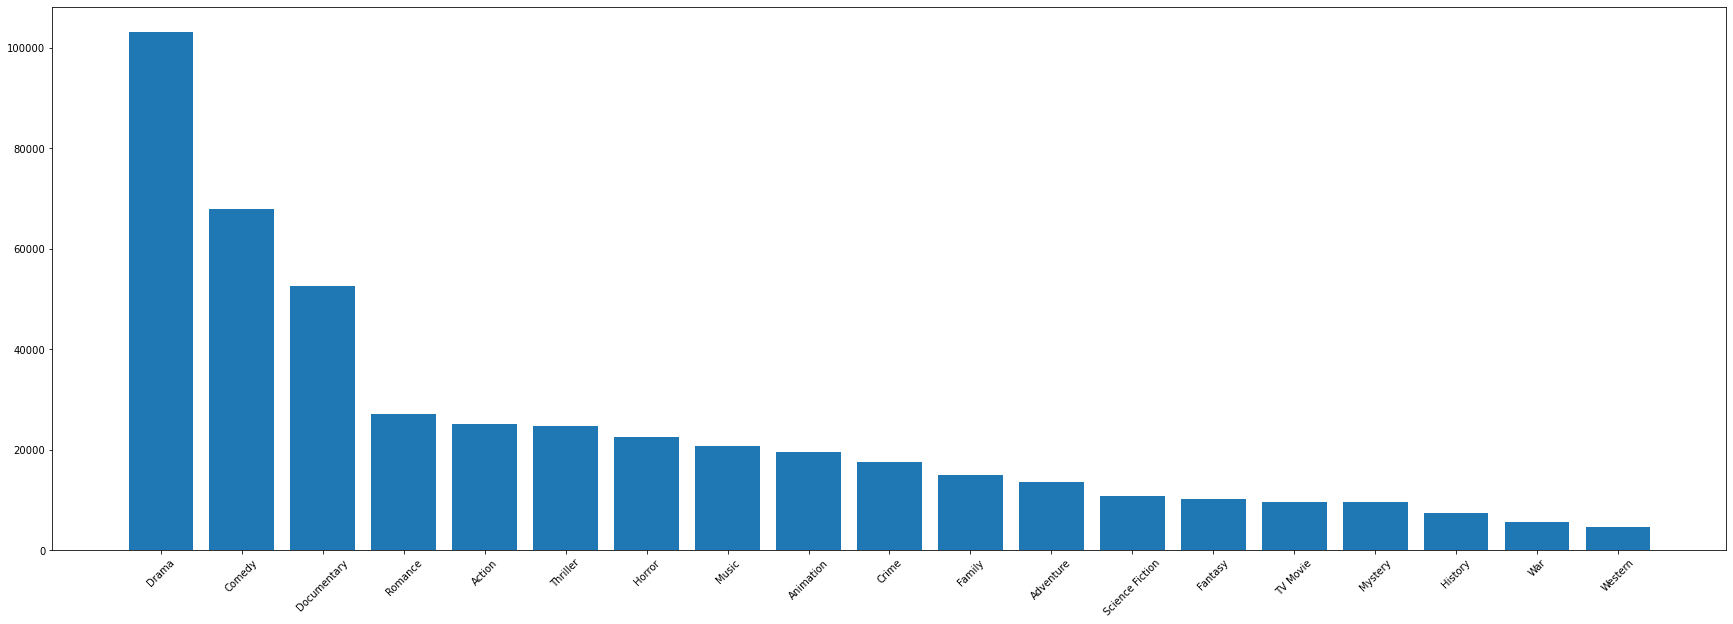

In [58]:
plt.figure(figsize=(30,10)) 
plt.bar(top30_separateClass.class_,top30_separateClass.name)
plt.xticks(rotation=45) 

In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse=False, handle_unknown="ignore").fit(movie_gender_name[['name']])
ohe_class=pd.DataFrame(ohe.transform(movie_gender_name[['name']]),columns=ohe.get_feature_names())
movie_gender_name.reset_index(drop=True, inplace=True)
movies_class = pd.concat([movie_gender_name, ohe_class], axis=1)
movies_class



,adult,id,original_title,popularity,video,url,poster_url,genre_id,name,x0_Action,...,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
0,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,80,Crime,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,18,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,537266,Success,0.600,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,18,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,537274,Предел возможного,0.620,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,18,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,537277,母親,0.600,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,18,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444520,False,31788,"Bill Hicks Live: Satirist, Social Critic, Stan...",5.355,False,https://www.themoviedb.org/movie/31788,https://www.themoviedb.org/t/p/w500//lz2poVfHS...,35,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444521,False,31789,Pédale douce,6.775,False,https://www.themoviedb.org/movie/31789,https://www.themoviedb.org/t/p/w500//xYFrGGsmK...,35,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444522,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,10402,Music,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444523,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,10402,Music,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
movies_class.isnull().sum()

adult                 0
id                    0
original_title        0
popularity            0
video                 0
url                   0
poster_url            0
genre_id              0
name                  0
x0_Action             0
x0_Adventure          0
x0_Animation          0
x0_Comedy             0
x0_Crime              0
x0_Documentary        0
x0_Drama              0
x0_Family             0
x0_Fantasy            0
x0_History            0
x0_Horror             0
x0_Music              0
x0_Mystery            0
x0_Romance            0
x0_Science Fiction    0
x0_TV Movie           0
x0_Thriller           0
x0_War                0
x0_Western            0
dtype: int64

In [47]:

movies_class.to_parquet("../data/interim/df_label_correct_exploded.gzip", compression='gzip')

In [48]:
tmp=pd.read_parquet("../data/interim/df_label_correct_exploded.gzip")





,adult,id,original_title,popularity,video,url,poster_url,genre_id,name,x0_Action,...,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
0,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,80,Crime,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,18,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,537266,Success,0.600,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,18,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,537274,Предел возможного,0.620,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,18,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,537277,母親,0.600,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,18,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444520,False,31788,"Bill Hicks Live: Satirist, Social Critic, Stan...",5.355,False,https://www.themoviedb.org/movie/31788,https://www.themoviedb.org/t/p/w500//lz2poVfHS...,35,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444521,False,31789,Pédale douce,6.775,False,https://www.themoviedb.org/movie/31789,https://www.themoviedb.org/t/p/w500//xYFrGGsmK...,35,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444522,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,10402,Music,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444523,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,10402,Music,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
tmp['name'].unique
genre_col=['x0_Action', 'x0_Adventure',
       'x0_Animation', 'x0_Comedy', 'x0_Crime', 'x0_Documentary', 'x0_Drama',
       'x0_Family', 'x0_Fantasy', 'x0_History', 'x0_Horror', 'x0_Music',
       'x0_Mystery', 'x0_Romance', 'x0_Science Fiction', 'x0_TV Movie',
       'x0_Thriller', 'x0_War', 'x0_Western' ]

       

In [56]:
buckets=[]
for x in genre_col:
  buckets.append(tmp[tmp[x]==1].sample(1000, random_state=42 ))


cience Fiction        0.0  ...         0.0        0.0       0.0   
 398083  Science Fiction        0.0  ...         0.0        0.0       0.0   
 
         x0_Mystery  x0_Romance  x0_Science Fiction  x0_TV Movie  x0_Thriller  \
 285377         0.0         0.0                 1.0          0.0          0.0   
 61705          0.0         0.0                 1.0          0.0          0.0   
 100700         0.0         0.0                 1.0          0.0          0.0   
 336477         0.0         0.0                 1.0          0.0          0.0   
 18530          0.0         0.0                 1.0          0.0          0.0   
 ...            ...         ...                 ...          ...          ...   
 219995         0.0         0.0                 1.0          0.0          0.0   
 35775          0.0         0.0                 1.0          0.0          0.0   
 366046         0.0         0.0                 1.0          0.0          0.0   
 345608         0.0         0.0             

In [57]:
samples_df=pd.concat(buckets)



In [59]:
samples_df.head(4)

,adult,id,original_title,popularity,video,url,poster_url,genre_id,name,x0_Action,...,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
173894,False,110155,T-O: Triángulo de oro - 'La isla fantasma',0.600,False,https://www.themoviedb.org/movie/110155,https://www.themoviedb.org/t/p/w500//f55BOgrfZ...,28,Action,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73806,False,686388,Răzbunarea,0.630,False,https://www.themoviedb.org/movie/686388,https://www.themoviedb.org/t/p/w500//hA8BF6uvx...,28,Action,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319178,False,206868,Strongheart,0.938,False,https://www.themoviedb.org/movie/206868,https://www.themoviedb.org/t/p/w500//anKywJHJy...,28,Action,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290906,False,359505,പതാക,0.600,False,https://www.themoviedb.org/movie/359505,https://www.themoviedb.org/t/p/w500//9pEiRnlD7...,28,Action,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
b1=samples_df[['id']+genre_col].groupby("id").sum()

In [66]:

b1

,x0_Action,x0_Adventure,x0_Animation,x0_Comedy,x0_Crime,x0_Documentary,x0_Drama,x0_Family,x0_Fantasy,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
id,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
803926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
803948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
b2= samples_df[[ "adult",	"id","original_title","popularity",	"video"	,"url"	,"poster_url"]].groupby("id").head(1)

In [69]:
b2

,adult,id,original_title,popularity,video,url,poster_url
173894,False,110155,T-O: Triángulo de oro - 'La isla fantasma',0.600,False,https://www.themoviedb.org/movie/110155,https://www.themoviedb.org/t/p/w500//f55BOgrfZ...
73806,False,686388,Răzbunarea,0.630,False,https://www.themoviedb.org/movie/686388,https://www.themoviedb.org/t/p/w500//hA8BF6uvx...
319178,False,206868,Strongheart,0.938,False,https://www.themoviedb.org/movie/206868,https://www.themoviedb.org/t/p/w500//anKywJHJy...
290906,False,359505,പതാക,0.600,False,https://www.themoviedb.org/movie/359505,https://www.themoviedb.org/t/p/w500//9pEiRnlD7...
208566,False,88183,High-Ballin',2.549,False,https://www.themoviedb.org/movie/88183,https://www.themoviedb.org/t/p/w500//9m4jlIRG4...
...,...,...,...,...,...,...,...
194547,False,772716,West of Leona,0.600,False,https://www.themoviedb.org/movie/772716,https://www.themoviedb.org/t/p/w500//1U35Zxo0G...
167923,False,200968,San Fernando Valley,3.123,False,https://www.themoviedb.org/movie/200968,https://www.themoviedb.org/t/p/w500//obdbagJ58...
171956,False,107239,Brothers O'Toole,3.694,False,https://www.themoviedb.org/movie/107239,https://www.themoviedb.org/t/p/w500//6robv5Htq...
336924,False,59943,Ghost Town: The Movie,6.230,False,https://www.themoviedb.org/movie/59943,https://www.themoviedb.org/t/p/w500//qAaEgzXph...


In [70]:
b3=pd.merge(b2,b1, on='id')

In [71]:
b3

,adult,id,original_title,popularity,video,url,poster_url,x0_Action,x0_Adventure,x0_Animation,...,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
0,False,110155,T-O: Triángulo de oro - 'La isla fantasma',0.600,False,https://www.themoviedb.org/movie/110155,https://www.themoviedb.org/t/p/w500//f55BOgrfZ...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,686388,Răzbunarea,0.630,False,https://www.themoviedb.org/movie/686388,https://www.themoviedb.org/t/p/w500//hA8BF6uvx...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,206868,Strongheart,0.938,False,https://www.themoviedb.org/movie/206868,https://www.themoviedb.org/t/p/w500//anKywJHJy...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,False,359505,പതാക,0.600,False,https://www.themoviedb.org/movie/359505,https://www.themoviedb.org/t/p/w500//9pEiRnlD7...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,88183,High-Ballin',2.549,False,https://www.themoviedb.org/movie/88183,https://www.themoviedb.org/t/p/w500//9m4jlIRG4...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18382,False,772716,West of Leona,0.600,False,https://www.themoviedb.org/movie/772716,https://www.themoviedb.org/t/p/w500//1U35Zxo0G...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18383,False,200968,San Fernando Valley,3.123,False,https://www.themoviedb.org/movie/200968,https://www.themoviedb.org/t/p/w500//obdbagJ58...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18384,False,107239,Brothers O'Toole,3.694,False,https://www.themoviedb.org/movie/107239,https://www.themoviedb.org/t/p/w500//6robv5Htq...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18385,False,59943,Ghost Town: The Movie,6.230,False,https://www.themoviedb.org/movie/59943,https://www.themoviedb.org/t/p/w500//qAaEgzXph...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:

movies_class.to_parquet("../data/interim/df_train_v1.gzip", compression='gzip')